In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_predict, GridSearchCV
from sklearn.metrics import jaccard_score,classification_report,confusion_matrix,RocCurveDisplay,accuracy_score
from sklearn.linear_model import  LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df=df.drop('customerID',axis=1)

In [ ]:
churn_rate=df['Churn'].value_counts()/len(df)*100
churn_rate

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

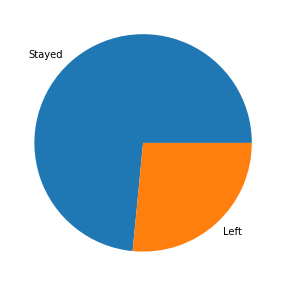

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(churn_rate,labels=['Stayed','Left'])
plt.show()

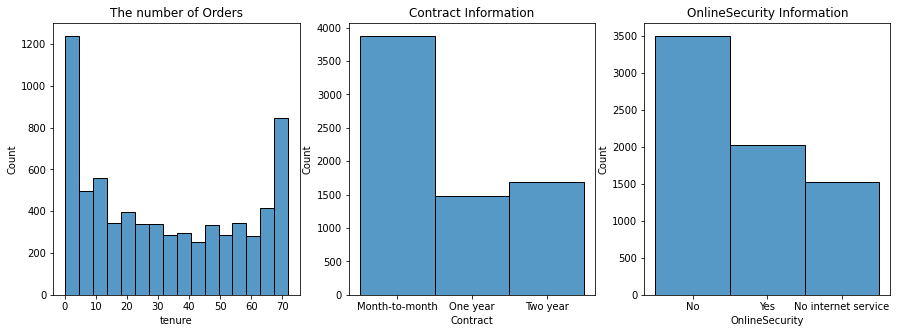

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(15,5))

sns.histplot(x="tenure",data=df,ax=axes[0])
axes[0].set_title("The number of Orders")

sns.histplot(x='Contract',data=df,ax=axes[1])
axes[1].set_title('Contract Information')

sns.histplot(x='OnlineSecurity',data=df,ax=axes[2])
axes[2].set_title('OnlineSecurity Information')

plt.show()

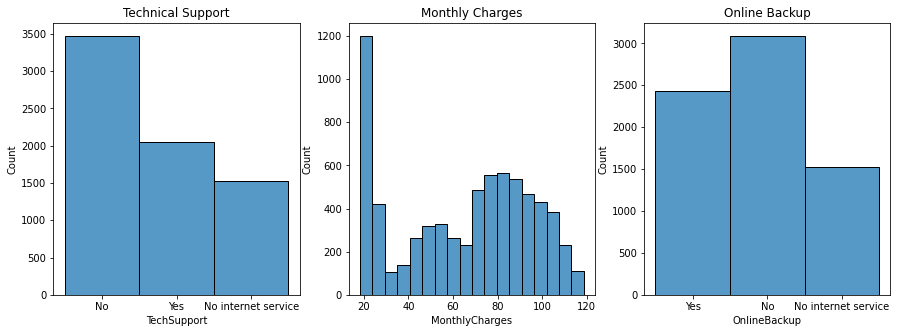

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(15,5))

sns.histplot(x="TechSupport",data=df,ax=axes[0])
axes[0].set_title("Technical Support")

sns.histplot(x='MonthlyCharges',data=df,ax=axes[1])
axes[1].set_title('Monthly Charges')

sns.histplot(x='OnlineBackup',data=df,ax=axes[2])
axes[2].set_title('Online Backup')

plt.show()

In [ ]:
label=LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


In [ ]:
df.corr().abs()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,0.010517,0.005106,0.006488,0.006739,0.000863,0.015017,0.012057,0.000549,0.006825,0.006421,0.008743,0.000126,0.011754,0.017352,0.014623,0.005291,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,0.211185,0.016567,0.008576,0.146185,0.032310,0.128221,0.013632,0.021398,0.151268,0.030776,0.047266,0.142554,0.156530,0.038551,0.219524,0.037653,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,0.014877,0.154798,0.106501,0.059568,0.150448
Dependents,0.010517,0.211185,0.452676,1.000000,0.159712,0.001762,0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,0.111377,0.040292,0.107507,0.009572,0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,0.370436,0.268133,0.158523,0.352229
PhoneService,0.006488,0.008576,0.017706,0.001762,0.008448,1.000000,0.020538,0.387436,0.015198,0.024105,0.003727,0.019158,0.055353,0.043870,0.002247,0.016505,0.004184,0.271209,0.083195,0.011942
MultipleLines,0.006739,0.146185,0.142410,0.024991,0.343032,0.020538,1.000000,0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,0.176793,0.444580,0.114955,0.038037
InternetService,0.000863,0.032310,0.000891,0.044590,0.030359,0.387436,0.109216,1.000000,0.028416,0.036138,0.044944,0.026047,0.107417,0.098350,0.099721,0.138625,0.086140,0.244965,0.055724,0.047291
OnlineSecurity,0.015017,0.128221,0.150828,0.152166,0.325468,0.015198,0.007141,0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,0.157641,0.096726,0.044692,0.042357,0.289309
OnlineBackup,0.012057,0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,0.013370,0.124847,0.141258,0.090756,0.195525


In [ ]:
df=df.drop(['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies','TotalCharges','PaymentMethod','gender'],axis=1)

In [ ]:
X=df.drop('Churn',axis=1)
y=df[['Churn']].copy()
ssc=StandardScaler()
X=ssc.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
LR_model=LogisticRegression()
LR_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_predicted=LR_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409

Accuracy:  0.8147622427253371


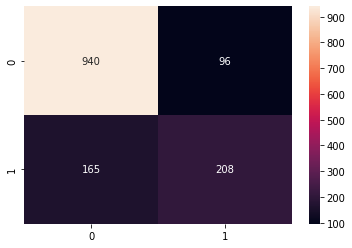

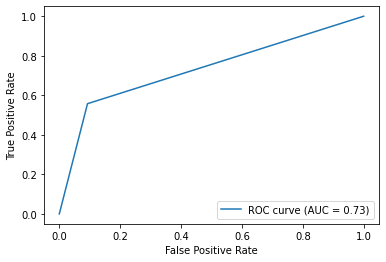

In [ ]:
print(classification_report(y_test,y_predicted))
print("Accuracy: ",metrics.accuracy_score(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt='g')
plt.show()

fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predicted)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC curve')
display.plot()
plt.show()

In [ ]:
svm=SVC()
svm.fit(X_train,y_train)
y_predicted=svm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Accuracy:  0.801277501774308


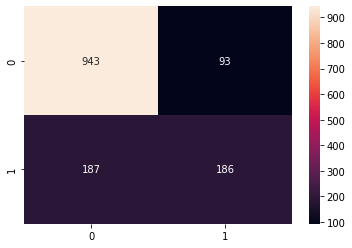

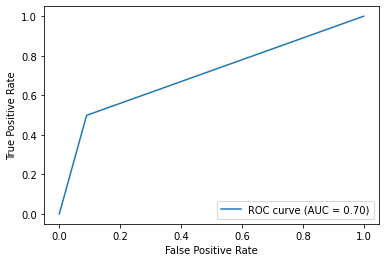

In [ ]:
print(classification_report(y_test,y_predicted))
print("Accuracy: ",metrics.accuracy_score(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt='g')
plt.show()

fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predicted)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC curve')
display.plot()
plt.show()